# Exercise 1

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

In [3]:
# Get data
data=fetch_openml(data_id=1220)

In [4]:
X=pd.DataFrame(data["data"], columns=data["feature_names"])
y=pd.Series(data["target"]).astype(int)

In [5]:
# Check target values count
y.value_counts()

0    33220
1     6728
dtype: int64

#### Split training and testing data

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=12)

## Build a naive Baysian (GaussianNB)

In [7]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import LogisticRegression
model=GaussianNB()

model.fit(X_train,y_train)

GaussianNB()

## Prediction based on test

In [8]:
y_pred=model.predict(X_test)

## Check model accuracy

In [9]:
model.score(X_test,y_test)

0.811639549436796

In [10]:
# Check confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[6423,  217],
       [1288,   62]], dtype=int64)

In [11]:
# Get precision and recall for each class
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      6640
           1       0.22      0.05      0.08      1350

    accuracy                           0.81      7990
   macro avg       0.53      0.51      0.49      7990
weighted avg       0.73      0.81      0.76      7990



#### Visualize the model accuracy 

In [12]:
# Get prediction probability

y_probs=model.predict_proba(X_test)
y_probs

array([[0.92183892, 0.07816108],
       [0.89476342, 0.10523658],
       [0.92196283, 0.07803717],
       ...,
       [0.9241829 , 0.0758171 ],
       [0.91081363, 0.08918637],
       [0.88678714, 0.11321286]])

In [13]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

roc_auc_score(y_test, y_probs[:,1])

0.5559729473449353

In [16]:
# Get false positive rate, true positive rate and thresholds
scores=y_probs[:,1]
fpr, tpr, thresholds=roc_curve(y_test,scores)
auc(fpr,tpr) # The same as roc_auc_score

0.5559729473449353

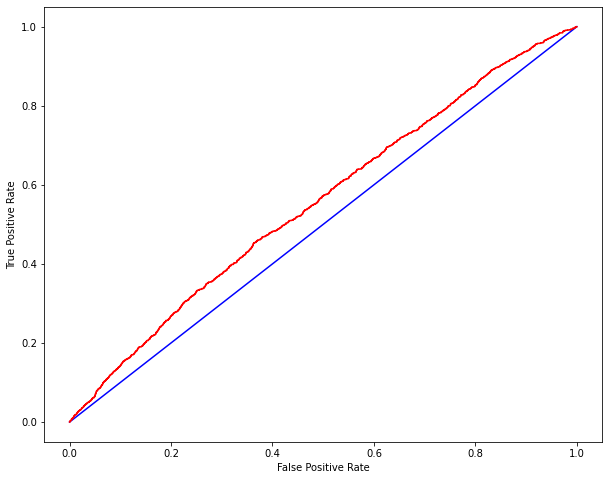

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

plt.plot([0,1],[0,1], color="b")
plt.plot(fpr, tpr, color="r", linestyle="-")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Using Resampling data to make better model

- Since the model seems not fit well data. This could be unbalanced values in target variable, hence to make them balanced.

In [100]:
from imblearn.under_sampling import RandomUnderSampler

In [103]:
from imblearn.over_sampling import RandomOverSampler

In [106]:
balance=RandomUnderSampler()

X_resample, y_resample=balance.fit_resample(X,y)

In [110]:
# Now the number of 1 is the same the number of 0
y_resample.value_counts()

1    6728
0    6728
dtype: int64

#### We can rerun the above model with X_resample, y_resample